Student: Arora, Sanjana
V00966221

Problem 8

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
df = pd.read_csv("candy-data.csv")

--2021-06-06 20:23:40--  https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5205 (5.1K) [text/plain]
Saving to: ‘candy-data.csv’

candy-data.csv      100%[===================>]   5.08K  --.-KB/s    in 0s      

2021-06-06 20:23:40 (53.8 MB/s) - ‘candy-data.csv’ saved [5205/5205]



In [ ]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [ ]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [ ]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
df.shape

(85, 13)

**8a. Closed matrix form of linear regression**

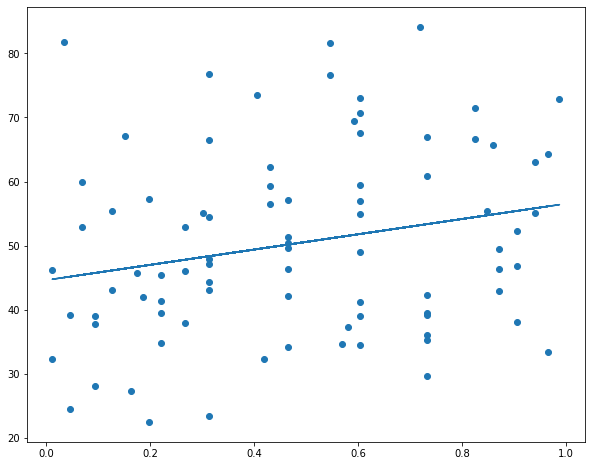

In [ ]:
X = df['sugarpercent'].values
Y = df['winpercent'].values
X_one = np.vstack((np.ones(X.shape[0]),X)).T
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(X_one.transpose().dot(X_one)).dot(X_one.transpose()).dot(Y)
Y_pred = X_one.dot(coeffs)
plt.figure(figsize=(10,8));
plt.scatter(X, Y);
plt.plot(X, Y_pred);

**Problem 8.b** **Linear Regression using skLearn Library**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X1 = df['sugarpercent'].values.reshape(-1,1)

In [ ]:
Y = df['winpercent']

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X1, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([11.92386329])

In [ ]:
model.intercept_

44.609441807534644

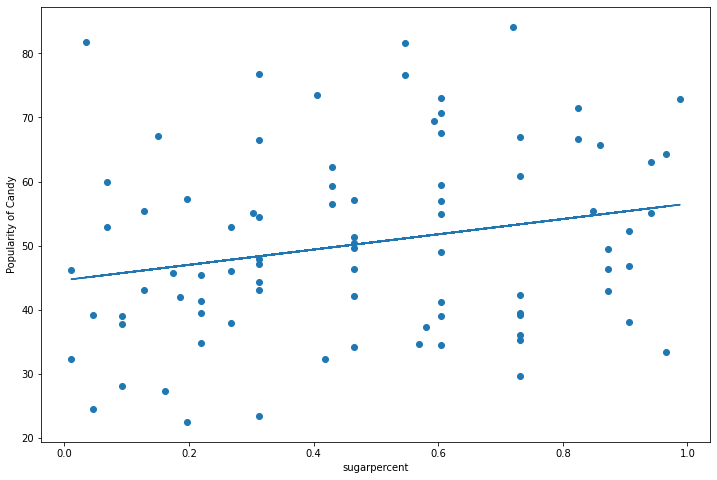

In [ ]:
Y_pred2 = model.predict(X1)
plt.figure(figsize=(12,8));
plt.scatter(X1, Y);
plt.plot(X1, Y_pred2);
plt.xlabel('sugarpercent')
plt.ylabel("Popularity of Candy")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3,shuffle = True)

Q8.C **Polynomial Regression with Quadratic Polynomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, Y_train)
Y_train_pred = lin_reg_2.predict(X_train_poly)

In [ ]:
X_test_poly = poly_reg.transform(X_test)
Y_test_pred = lin_reg_2.predict(X_test_poly)

In [ ]:
#Calculating the errors
from sklearn.metrics import mean_absolute_error
print ('The training MAE:', mean_absolute_error(Y_train, Y_train_pred))

The training MAE: 11.016333252750956


In [ ]:
print ('The testing MAE:', mean_absolute_error(Y_test, Y_test_pred))

The testing MAE: 12.595777009818082


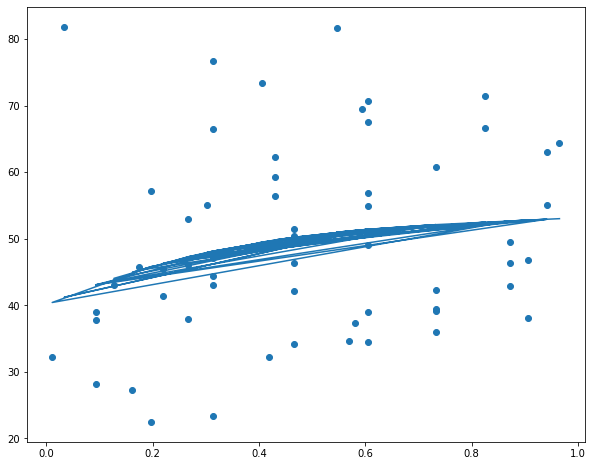

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(X_train,Y_train);
plt.plot(X_train, Y_train_pred);

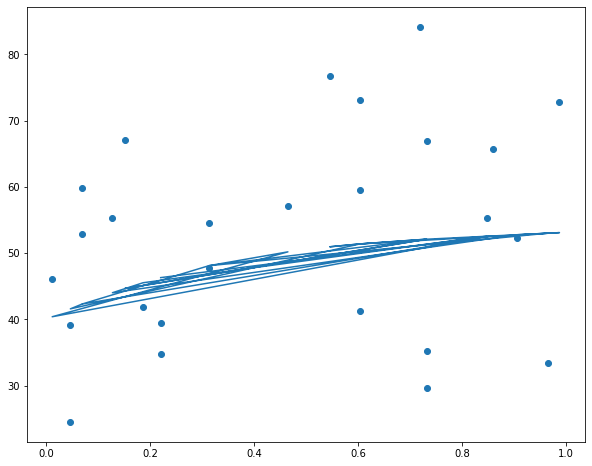

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(X_test,Y_test);
plt.plot(X_test, Y_test_pred);

**8D Linear Regression with extra feature + regression plane**

In [ ]:
X2 = df[['pricepercent', 'sugarpercent']]
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X2, Y)
y_pred3 = lin_reg_3.predict(X2)
coefs = lin_reg_3.coef_
intercept = lin_reg_3.intercept_
from mpl_toolkits.mplot3d import Axes3D
import random

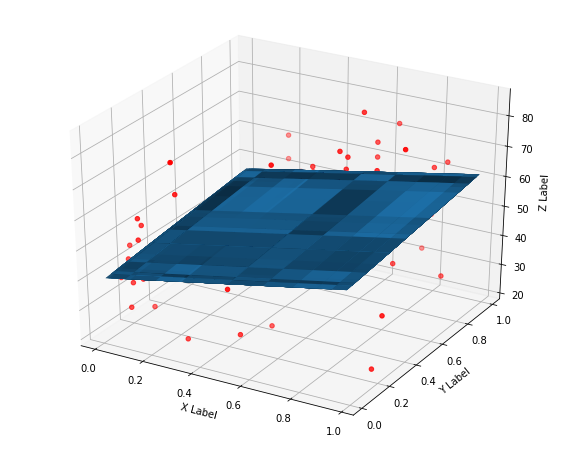

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2['pricepercent'], X2['sugarpercent'], Y, c='red', marker='o')
# taking the two features on two different axes
xs = np.tile(X2['pricepercent'], (1,1))
ys = np.tile(X2['sugarpercent'], (1,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show() 

**8E. Ridge Regression**

In [ ]:
df_transformed = pd.get_dummies(df['competitorname'])
result = pd.concat([df,df_transformed], axis=1).reindex(df_transformed.index)
result.drop(['competitorname'], axis=1, inplace= True)

result = result[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', '100 Grand', '3 Musketeers', 'Air Heads',
       'Almond Joy', 'Baby Ruth', 'Boston Baked Beans', 'Candy Corn',
       'Caramel Apple Pops', 'Charleston Chew', 'Chewey Lemonhead Fruit Mix',
       'Chiclets', 'Dots', 'Dum Dums', 'Fruit Chews', 'Fun Dip', 'Gobstopper',
       'Haribo Gold Bears', 'Haribo Happy Cola', 'Haribo Sour Bears',
       'Haribo Twin Snakes', 'HersheyÕs Kisses', 'HersheyÕs Krackel',
       'HersheyÕs Milk Chocolate', 'HersheyÕs Special Dark', 'Jawbusters',
       'Junior Mints', 'Kit Kat', 'Laffy Taffy', 'Lemonhead',
       'Lifesavers big ring gummies', 'M&MÕs', 'Mike & Ike', 'Milk Duds',
       'Milky Way', 'Milky Way Midnight', 'Milky Way Simply Caramel', 'Mounds',
       'Mr Good Bar', 'Nerds', 'Nestle Butterfinger', 'Nestle Crunch',
       'Nestle Smarties', 'Nik L Nip', 'Now & Later', 'One dime',
       'One quarter', 'Payday', 'Peanut M&Ms', 'Peanut butter M&MÕs',
       'Pixie Sticks', 'Pop Rocks', 'Red vines', 'ReeseÕs Miniatures',
       'ReeseÕs Peanut Butter cup', 'ReeseÕs pieces',
       'ReeseÕs stuffed with pieces', 'Ring pop', 'Rolo', 'Root Beer Barrels',
       'Runts', 'Sixlets', 'Skittles original', 'Skittles wildberry',
       'Smarties candy', 'Snickers', 'Snickers Crisper', 'Sour Patch Kids',
       'Sour Patch Tricksters', 'Starburst', 'Strawberry bon bons',
       'Sugar Babies', 'Sugar Daddy', 'Super Bubble', 'Swedish Fish',
       'Tootsie Pop', 'Tootsie Roll Juniors', 'Tootsie Roll Midgies',
       'Tootsie Roll Snack Bars', 'Trolli Sour Bites', 'Twix', 'Twizzlers',
       'Warheads', 'WelchÕs Fruit Snacks', 'WertherÕs Original Caramel',
       'Whoppers','winpercent',]]
print(result.columns)
from sklearn import linear_model
X = result.iloc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,shuffle=True, random_state=42)
alphas = np.array([0.1, 1, 2])
MAE =[]
MAE1 =[]
for a in alphas:
  ridge = linear_model.Ridge(alpha=a)
  ridge.fit(X_train, Y_train)
  y_predTrain = ridge.predict(X_train)
  y_pred = ridge.predict(X_test)
  acc1 = mean_absolute_error(Y_test,y_pred)
  acc2 = mean_absolute_error(Y_train,y_predTrain)
  MAE.append(acc1)
  MAE1.append(acc2)

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', '100 Grand', '3 Musketeers', 'Air Heads', 'Almond Joy',
       'Baby Ruth', 'Boston Baked Beans', 'Candy Corn', 'Caramel Apple Pops',
       'Charleston Chew', 'Chewey Lemonhead Fruit Mix', 'Chiclets', 'Dots',
       'Dum Dums', 'Fruit Chews', 'Fun Dip', 'Gobstopper', 'Haribo Gold Bears',
       'Haribo Happy Cola', 'Haribo Sour Bears', 'Haribo Twin Snakes',
       'HersheyÕs Kisses', 'HersheyÕs Krackel', 'HersheyÕs Milk Chocolate',
       'HersheyÕs Special Dark', 'Jawbusters', 'Junior Mints', 'Kit Kat',
       'Laffy Taffy', 'Lemonhead', 'Lifesavers big ring gummies', 'M&MÕs',
       'Mike & Ike', 'Milk Duds', 'Milky Way', 'Milky Way Midnight',
       'Milky Way Simply Caramel', 'Mounds', 'Mr Good Bar', 'Nerds',
       'Nestle Butterfinger', 'Nestle Crunch', 'Nestle Smarties', 'Nik L Nip',
       'Now & Later', 'One dime', '

In [ ]:
# the mean absolute error of testing dataset of each of the ridge regression model
MAE

[9.601292020253368, 9.808981187276734, 9.975491610478494]

In [ ]:
# the mean absolute error of training dataset of redge regression model with different values of alphas
MAE1

[0.7138692295132761, 3.961186850384925, 5.325433188893213]

Ridge regression model with alpha 0.1 is having the least mean absolute error rates for both training and testing dataset. Therefore, the ridge regression model with alpha 0.1 is the best.